In [2]:
import LinearNet as nn

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Load MNIST Dataset

In [3]:
mnist = datasets.load_digits()

In [7]:
X_mnist = mnist.data
y_mnist = mnist.target

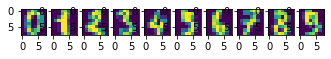

In [40]:
for i in range(1, 11):
  plt.subplot(1, 11, i)
  plt.imshow(X_mnist[i-1].reshape(8,8))
plt.show()

In [44]:
#apply one-hot encoding
oh_encoding = nn.OneHotEncoding()
y_mnist_categorical = oh_encoding(y_mnist)

y_mnist_categorical[0:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist_categorical, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

## 2) Neural Network

In [76]:
model = nn.NeuralNet()

#Linear[64, 128] -> Tanh -> Linear[128, 16] -> Tanh -> Linear[16, 16] -> SoftMax
model.Sequential(nn.Linear(64,128),
                 nn.Tanh(),
                 nn.Linear(128, 16),
                 nn.Tanh(),
                 nn.Linear(16, 10),
                 nn.SoftMax())

loss_fn = nn.CrossEntropyLoss()
epochs = 250
lr = 0.001

In [77]:
model.hyperparameters

10554

In [78]:
model_out = model.train(X_train,
                        y_train,
                        loss_fn,
                        epochs,
                        lr)

Epoch #25	Loss: 1473.127	Acc: 0.798
Epoch #50	Loss: 849.379	Acc: 0.906
Epoch #75	Loss: 646.668	Acc: 0.932
Epoch #100	Loss: 535.953	Acc: 0.946
Epoch #125	Loss: 463.102	Acc: 0.951
Epoch #150	Loss: 420.676	Acc: 0.959
Epoch #175	Loss: 374.54	Acc: 0.965
Epoch #200	Loss: 333.686	Acc: 0.969
Epoch #225	Loss: 300.65	Acc: 0.974
Epoch #250	Loss: 279.26	Acc: 0.977


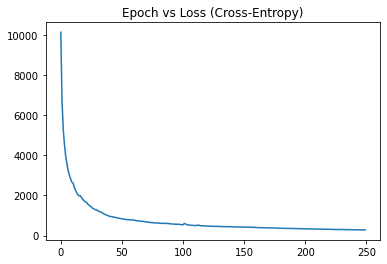

In [79]:
plt.plot(np.arange(0, len(model_out["loss_hist"])), model_out["loss_hist"])
plt.title("Epoch vs Loss (Cross-Entropy)")
plt.show()

In [80]:
preds = np.array([np.argmax(model(X_test[i])) for i in range(X_test.shape[0])])

In [81]:
preds

array([6, 9, 3, 7, 7, 1, 5, 2, 5, 2, 3, 9, 7, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 5, 3, 5, 6, 3, 4, 8, 3, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       7, 1, 1, 0, 6, 5, 3, 1, 1, 5, 6, 0, 5, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 6, 1, 7, 0, 4, 6, 5, 2, 9, 9, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 7, 4, 3, 5, 3, 1, 3, 5, 9, 4, 3,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 3, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 9, 0, 9, 6, 4, 9, 9, 6, 9, 0, 5, 5, 0, 6, 0,
       6, 4, 8, 9, 3, 9, 7, 2, 5, 0, 4, 5, 3, 6, 5, 1, 9, 9, 4, 2, 1, 3,
       7, 3, 2, 2, 3, 0, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 4, 5, 9, 2, 3, 5,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 7, 6, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 9, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 9, 8, 5,
       5, 1, 0, 1, 8, 3, 9, 1, 7, 6, 2, 2, 2, 3, 7, 8, 2, 3, 7, 0, 5, 7,
       5, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 9, 3, 6, 5, 9, 7, 3, 5,
       5, 8, 9, 8, 5, 3, 3, 7, 0, 6, 8, 3, 4, 0, 2,

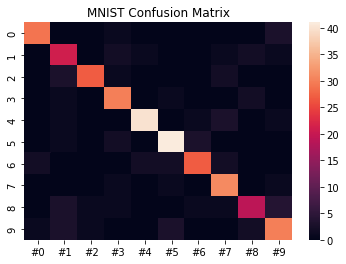

In [82]:
conf_mat = pd.DataFrame(confusion_matrix(np.apply_along_axis(np.argmax, 1, y_test), preds), columns=[f"#{name}" for _, name in enumerate(mnist.target_names)])
sns.heatmap(conf_mat)
plt.title("MNIST Confusion Matrix")
plt.show()